pandas is a Python package for manipulating and analyzing tables of data, e.g. from spreadsheets.
The most common data set is a 2D data, often corresponding to a single sheet in excel.
This is called a data frame.
The first row contains column labels (strings) also called axis 1
the first column may be labels
or data. Rows by default are assigned index values: 0....nrow

In [1]:
import pandas as pd
import openpyxl
# read in data, print column headings, so we know what they are
#kn = pd.read_excel('kinesin_data.xlsx')
kn = pd.read_csv('kinesin_data.csv')
print(kn.axes)

[RangeIndex(start=0, stop=1785, step=1), Index(['Motor', 'Track #', 'Label', 'Number spots', 'Number Gaps',
       'Longest Gap', 'Number Splits', 'Number Merges', 'Number Complex',
       'Track Duration', 'Track start', 'Track stop', 'Track Displacement',
       'Track Index', 'Track ID', 'Track X Location', 'Track Y Location',
       'Track Z Location', 'Track Mean Speed', 'Track Max Speed',
       'Track Min Speed', 'Track Median Speed', 'Track STD Speed',
       'Track Mean Quality', 'Track Max Quality', 'Track Min Quality',
       'Track Median Quality', 'Track Std Quality'],
      dtype='object')]


Print a few rows at beginning and end

In [2]:
print(kn.head(5))
print(kn.tail(5))

       Motor  Track #     Label  Number spots  Number Gaps  Longest Gap  \
0  Kinesin-4        1  Track_10            16            0            0   
1  Kinesin-4        2  Track_11            56            0            0   
2  Kinesin-4        3  Track_20            48            0            0   
3  Kinesin-4        4  Track_21           138            0            0   
4  Kinesin-4        5  Track_23           132            1            1   

   Number Splits  Number Merges  Number Complex  Track Duration  ...  \
0              0              0               0           8.385  ...   
1              0              0               0          30.745  ...   
2              0              0               0          26.273  ...   
3              0              0               0          76.583  ...   
4              0              0               0          73.788  ...   

   Track Mean Speed  Track Max Speed  Track Min Speed  Track Median Speed  \
0             0.086            0.274   

Various way to access pieces of the data

In [3]:
#print(kn.iloc[3])  # fourth row
#print(kn.loc[1:3,'Track Index'])  # track index for 3 rows
tmq = kn.loc[:,'Track Min Quality']  # form a data series from a column
print(tmq)

0       1014.522
1        375.197
2        385.016
3        286.204
4        298.115
          ...   
1780     406.253
1781     461.422
1782     488.279
1783     169.855
1784     570.971
Name: Track Min Quality, Length: 1785, dtype: float64


In [4]:
tmq.describe()

count    1785.000000
mean      515.784593
std       241.698767
min        36.964000
25%       360.544000
50%       537.275000
75%       665.159000
max      2119.441000
Name: Track Min Quality, dtype: float64

One of the most useful features of pandas is data filtering. For example we'll only keep data with a certain minimum quality (chosen with the help of the above summary)
and drop some columns with data we don't need

In [5]:
kn = kn[kn['Track Min Quality']>300.]
kn = kn.drop('Number Splits',axis=1)
kn = kn.drop('Number Merges',axis=1)
kn = kn.drop('Number Complex',axis=1)
print(kn.axes)
print(kn.head(5))

[Index([   0,    1,    2,    5,    6,    7,    8,    9,   10,   11,
       ...
       1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1784],
      dtype='int64', length=1437), Index(['Motor', 'Track #', 'Label', 'Number spots', 'Number Gaps',
       'Longest Gap', 'Track Duration', 'Track start', 'Track stop',
       'Track Displacement', 'Track Index', 'Track ID', 'Track X Location',
       'Track Y Location', 'Track Z Location', 'Track Mean Speed',
       'Track Max Speed', 'Track Min Speed', 'Track Median Speed',
       'Track STD Speed', 'Track Mean Quality', 'Track Max Quality',
       'Track Min Quality', 'Track Median Quality', 'Track Std Quality'],
      dtype='object')]
       Motor  Track #     Label  Number spots  Number Gaps  Longest Gap  \
0  Kinesin-4        1  Track_10            16            0            0   
1  Kinesin-4        2  Track_11            56            0            0   
2  Kinesin-4        3  Track_20            48            0            0   
5  Kin

In [6]:
kn['Track Min Quality'].describe() # check the new min quality

count    1437.000000
mean      597.293070
std       192.696695
min       300.179000
25%       471.645000
50%       589.260000
75%       686.874000
max      2119.441000
Name: Track Min Quality, dtype: float64

Split into two data frames based on kinesin motor type

In [7]:
kn1 = kn[kn['Motor'] == 'Kinesin-1']
kn4 = kn[kn['Motor'] == 'Kinesin-4']
print(kn1.size, kn4.size)

21600 14325


Another useful feature is sorting

In [8]:
kn1 = kn1.sort_values(by='Track Displacement',ascending=False)
kn4 = kn4.sort_values(by='Track Displacement')

In [9]:
kn1.head(5)

Motor  Track #        Label  Number spots  Number Gaps  Longest Gap  \
1001  Kinesin-1      105  Track_10968            19            0            0   
1051  Kinesin-1        8    Track_365            21            2            2   
922   Kinesin-1       26   Track_3265             9            0            0   
996   Kinesin-1      100  Track_10260            24            1            1   
1271  Kinesin-1       80   Track_3126            13            1            2   

      Track Duration  Track start  Track stop  Track Displacement  ...  \
1001          10.044      218.736     228.780               4.886  ...   
1051          12.834       20.646      33.480               4.371  ...   
922            4.464       68.076      72.540               3.075  ...   
996           13.392      204.228     217.620               2.598  ...   
1271           7.742      160.923     168.665               2.583  ...   

      Track Mean Speed  Track Max Speed  Track Min Speed  Track Median Speed  \
1001             0.541            1.694            0.137               0.390   
1051             0.334            0.980            0.146               0.272   
922              0.689            1.945            0.455               0.523   
996              0.233            1.689            0.012               0.080   
1271             0.348            1.166            0.015               0.298   

      Track STD Speed  Track Mean Quality  Track Max Quality  \
1001            0.442             777.926            965.081   
1051            0.239             736.865            921.230   
922             0.509             741.874            865.517   
996             0.367             763.525            987.686   
1271            0.352             707.219            837.106   

      Track Min Quality  Track Median Quality  Track Std Quality  
1001            517.079               800.144            117.300  
1051            559.909               740.041             99.946  
922             624.745               754.238             68.272  
996             475.759               799.779            120.375  
1271            533.038               752.077             95.936  

[5 rows x 25 columns]

In [10]:
# do some data analysis
kn1['Track Displacement'].describe() 

count    864.000000
mean       0.661416
std        0.464687
min        0.288000
25%        0.352000
50%        0.483000
75%        0.770250
max        4.886000
Name: Track Displacement, dtype: float64

In [11]:
# do some data analysis
kn4['Track Displacement'].describe() 

count    573.000000
mean       1.409099
std        1.404090
min        0.274000
25%        0.559000
50%        0.961000
75%        1.461000
max        8.364000
Name: Track Displacement, dtype: float64

write out data to a text file


In [12]:
td1 = kn1.loc[:,'Track Displacement']
td4 = kn4.loc[:,'Track Displacement']
td1.to_csv('kinesin1_trackdisplacement.csv', header=True)
td4.to_csv('kinesin4_trackdisplacement.csv', header=False)

pandas is layered on top of the matploblib package, so we can plot data using similar coommands

<Axes: ylabel='Frequency'>

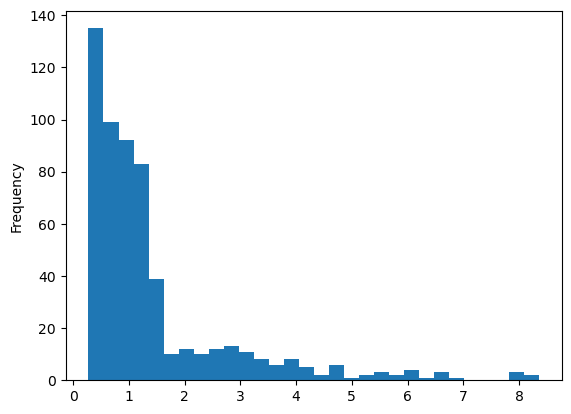

In [14]:
#%matplotlib inline
td4.plot.hist(bins=30)